In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
working_path = "/content/drive/My Drive/FBA 2025 PERSONAL/"

In [ ]:
df = pd.read_csv(working_path + 'master_df.csv')

#EDA:

##**Dataset Description**
1. Customer Identification

- **customer_id**: Unique identifier for each customer.

2. Demographic & Social Information

- **age**: Customer’s age.

- **income_level**: Monthly income level.

- **home_ownership_status**: Home ownership status.

3. Financial Stability Information

- **employment_status**: Employment status.

- **years_at_current_job**: Number of years at the current job.

4. Financial Health Information

- **credit_score**: Credit score.

- **existing_debt_vnd**: Total existing debt of the customer (in VND).

- **savings_amount_vnd**: Customer’s current savings (in VND).

5. Loan Information

- **loan_purpose**: Purpose of the loan.

- **requested_loan_amount_vnd**: Loan amount requested by the customer (in VND).

- **loan_term_months**: Loan term (in months).

6. Target Variable (Outcome)

- **default_status**: Loan outcome (default or not).

7. Newly Added Variables

- **income_level_en**: Categorized monthly income level (English label).

- **credit_rating**: Credit score rating.

- **debt_to_savings_ratio**: Debt-to-savings ratio.



### 1. Thông tin định danh khách hàng
- **customer_id**: Mã định danh duy nhất cho mỗi khách hàng.

### 2. Thông tin nhân khẩu học & xã hội
- **age**: Tuổi của khách hàng.  
- **income_level**: Mức thu nhập hàng tháng.  
- **home_ownership_status**: Tình trạng sở hữu nhà ở.

### 3. Thông tin về sự ổn định tài chính
- **employment_status**: Tình trạng việc làm.  
- **years_at_current_job**: Số năm làm việc tại công việc hiện tại.

### 4. Thông tin về sức khỏe tài chính
- **credit_score**: Điểm tín dụng.  
- **existing_debt_vnd**: Tổng số nợ hiện có của khách hàng.  
- **savings_amount_vnd**: Số tiền tiết kiệm khách hàng đang có.

### 5. Thông tin về khoản vay
- **loan_purpose**: Mục đích của khoản vay.  
- **requested_loan_amount_vnd**: Số tiền khách hàng yêu cầu vay.  
- **loan_term_months**: Thời hạn vay (tính bằng tháng).

### 6. Biến mục tiêu (Kết quả)
- **default_status**: Kết quả của khoản vay.

### 7. Biến mới vừa thêm
- **income_level_en**: Phân loại mức thu nhập hằng tháng.  
- **credit_rating**: Xếp hạng điểm tín dụng.  
- **debt_to_savings_ratio**: Tỷ lệ nợ trên tiết kiệm.


In [ ]:
df

,customer_id,age,income_level,employment_status,years_at_current_job,credit_score,existing_debt_vnd,savings_amount_vnd,home_ownership_status,loan_purpose,requested_loan_amount_vnd,loan_term_months,default_status,income_level_en,credit_rating,debt_to_savings_ratio
0,CUST-00001,65,Từ 8 - 20 triệu VND/tháng,Toàn thời gian,8,551,647700000,176700000,Thuê nhà,Hợp nhất nợ,389000000,60,Defaulted,Medium,Poor,3.665535
1,CUST-00002,21,Từ 8 - 20 triệu VND/tháng,Toàn thời gian,0,754,263900000,585700000,Thuê nhà,Sửa chữa nhà,644000000,36,Paid in full,Medium,Very Good,0.450572
2,CUST-00003,59,Từ 8 - 20 triệu VND/tháng,Toàn thời gian,22,654,650700000,323900000,Thuê nhà,Hợp nhất nợ,284000000,36,Paid in full,Medium,Fair,2.008953
3,CUST-00004,36,Từ 8 - 20 triệu VND/tháng,Bán thời gian,8,488,230900000,142000000,Thuê nhà,Sửa chữa nhà,392000000,36,Defaulted,Medium,Poor,1.626056
4,CUST-00005,52,Từ 8 - 20 triệu VND/tháng,Toàn thời gian,30,728,163000000,86200000,Trả góp,Hợp nhất nợ,400000000,24,Paid in full,Medium,Good,1.890951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CUST-49996,50,Từ 20 - 45 triệu VND/tháng,Toàn thời gian,16,736,771500000,1502900000,Trả góp,Mua xe,1043000000,36,Paid in full,High,Good,0.513341
49996,CUST-49997,26,Từ 8 - 20 triệu VND/tháng,Bán thời gian,5,709,627800000,485900000,Thuê nhà,Y tế,207000000,36,Paid in full,Medium,Good,1.292035
49997,CUST-49998,45,Từ 20 - 45 triệu VND/tháng,Toàn thời gian,0,586,2341500000,1146700000,Trả góp,Sửa chữa nhà,1196000000,36,Defaulted,High,Fair,2.041946
49998,CUST-49999,46,Từ 8 - 20 triệu VND/tháng,Tự kinh doanh,14,603,765100000,575600000,Thuê nhà,Mua xe,628000000,48,Defaulted,Medium,Fair,1.329222


##Dataset Rows & Columns count

In [ ]:

# Dataset Rows & Columns count'
print('Number of rows : ',df.shape[0])
print('Number of columns : ',df.shape[1])

Number of rows :  50000
Number of columns :  16


Comment:
- Has a total of 50,000 rows
- Inititally has 13 variables, and 3 newly added variables

##Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                50000 non-null  object 
 1   age                        50000 non-null  int64  
 2   income_level               50000 non-null  object 
 3   employment_status          50000 non-null  object 
 4   years_at_current_job       50000 non-null  int64  
 5   credit_score               50000 non-null  int64  
 6   existing_debt_vnd          50000 non-null  int64  
 7   savings_amount_vnd         50000 non-null  int64  
 8   home_ownership_status      50000 non-null  object 
 9   loan_purpose               50000 non-null  object 
 10  requested_loan_amount_vnd  50000 non-null  int64  
 11  loan_term_months           50000 non-null  int64  
 12  default_status             50000 non-null  object 
 13  income_level_en            50000 non-null  obj

In [ ]:
df.describe()

,age,years_at_current_job,credit_score,existing_debt_vnd,savings_amount_vnd,requested_loan_amount_vnd,loan_term_months,debt_to_savings_ratio
count,50000.000000,50000.00000,50000.00000,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,43.099020,10.89498,654.92978,7.628543e+08,7.870241e+08,5.896935e+08,36.672240,3.565248
std,13.016917,8.40605,84.90512,8.848939e+08,1.660678e+09,6.238399e+08,13.405384,6.778485
min,21.000000,0.00000,300.00000,2.500000e+07,2.500000e+06,2.500000e+07,12.000000,0.043945
25%,32.000000,4.00000,597.00000,2.466750e+08,8.700000e+07,1.820000e+08,24.000000,0.910503
50%,43.000000,10.00000,655.00000,4.846000e+08,2.921000e+08,4.010000e+08,36.000000,1.733151
75%,54.000000,17.00000,714.00000,8.883250e+08,5.907000e+08,6.960000e+08,48.000000,3.457136
max,65.000000,30.00000,850.00000,6.248200e+09,1.249450e+10,3.748000e+09,60.000000,139.038462


##Data quality
* Completeness
* Accuracy
* Consistency
* Validity
* Uniqueness

### Completeness (Missing Values)

In [ ]:
# Completeness:
df.isna().sum()
#=> So, there is no missing or empty data here.


,0
customer_id,0
age,0
income_level,0
employment_status,0
years_at_current_job,0
credit_score,0
existing_debt_vnd,0
savings_amount_vnd,0
home_ownership_status,0
loan_purpose,0


###Uniqueness(Duplicate Values)

In [ ]:
# Missing Values/Null Values Count
print("Total Number of null values : ",df.isnull().sum())

Total Number of null values :  customer_id                  0
age                          0
income_level                 0
employment_status            0
years_at_current_job         0
credit_score                 0
existing_debt_vnd            0
savings_amount_vnd           0
home_ownership_status        0
loan_purpose                 0
requested_loan_amount_vnd    0
loan_term_months             0
default_status               0
income_level_en              0
credit_rating                0
debt_to_savings_ratio        0
dtype: int64


##Numerical Features

In [ ]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 8 numerical features: 

['age', 'years_at_current_job', 'credit_score', 'existing_debt_vnd', 'savings_amount_vnd', 'requested_loan_amount_vnd', 'loan_term_months', 'debt_to_savings_ratio']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50000.0,4.309902e+01,1.301692e+01,2.100000e+01,3.200000e+01,4.300000e+01,5.400000e+01,6.500000e+01
years_at_current_job,50000.0,1.089498e+01,8.406050e+00,0.000000e+00,4.000000e+00,1.000000e+01,1.700000e+01,3.000000e+01
credit_score,50000.0,6.549298e+02,8.490512e+01,3.000000e+02,5.970000e+02,6.550000e+02,7.140000e+02,8.500000e+02
existing_debt_vnd,50000.0,7.628543e+08,8.848939e+08,2.500000e+07,2.466750e+08,4.846000e+08,8.883250e+08,6.248200e+09
savings_amount_vnd,50000.0,7.870241e+08,1.660678e+09,2.500000e+06,8.700000e+07,2.921000e+08,5.907000e+08,1.249450e+10
requested_loan_amount_vnd,50000.0,5.896935e+08,6.238399e+08,2.500000e+07,1.820000e+08,4.010000e+08,6.960000e+08,3.748000e+09
loan_term_months,50000.0,3.667224e+01,1.340538e+01,1.200000e+01,2.400000e+01,3.600000e+01,4.800000e+01,6.000000e+01
debt_to_savings_ratio,50000.0,3.565248e+00,6.778485e+00,4.394489e-02,9.105032e-01,1.733151e+00,3.457136e+00,1.390385e+02


**Comment**
1. age (tuổi)

- Trung bình: ~43 tuổi.

- Min: 21, Max: 65 → hợp lý, phản ánh nhóm khách hàng trong độ tuổi lao động – vay vốn.

- Phân phối khá đều, không có outlier bất thường.

2. years_at_current_job (số năm làm việc ở công việc hiện tại)

- Trung bình: ~11 năm, min = 0, max = 30.

- Median = 10 → nhiều khách hàng làm ổn định trên 10 năm.

- Tuy nhiên, có giá trị 0 năm → nhóm mới đi làm / mới đổi việc.

3. credit_score (điểm tín dụng)

- Mean ~655, Median ~655, Std ~85 → khá ổn định.

- Min = 300, Max = 850 → đúng chuẩn thang điểm FICO (300–850).

- Nhìn chung, dữ liệu sạch, phân phối chuẩn.

4. existing_debt_vnd (nợ hiện có)

- Mean: ~763 triệu VND, Median ~485 triệu VND.

- Max: ~6.2 tỷ VND → có outlier rất lớn.

- Độ lệch chuẩn cao (885 triệu) → dữ liệu phân tán, có vài cá nhân nợ rất cao.-> phân phối có xu hướng lệch phải

5. savings_amount_vnd (tiền tiết kiệm)

- Mean: ~787 triệu VND, Median ~292 triệu VND.

- Max: ~12.5 tỷ VND → tồn tại outlier cực lớn.

- Std (1.66 tỷ) cao hơn cả mean → phân phối lệch phải mạnh (nhiều khách hàng tiết kiệm thấp, vài khách hàng có tiết kiệm cực cao).

6. requested_loan_amount_vnd (số tiền vay yêu cầu)

- Mean: ~590 triệu VND, Median ~401 triệu VND.

- Max: ~3.7 tỷ VND → có một số khoản vay rất lớn.

- Std ~624 triệu, khá cao → phân phối loan amount khá phân tán.

- Hầu hết loan < 700M.

7. loan_term_months (kỳ hạn vay)

- Trung bình ~36 tháng (3 năm).

- Min = 12, Max = 60 tháng → hợp lý (1–5 năm).

- Median = 36 → đa số chọn vay trong 3 năm.

8. debt_to_savings_ratio (tỷ lệ nợ / tiết kiệm)

- Mean = 3.56, Median ~1.73.

- Min = 0.04 → có khách hầu như không nợ.

- Max = 139 → outlier cực lớn (nợ gấp hàng trăm lần tiết kiệm).

- Std ~6.77 → phân phối lệch phải mạnh.


=> Suy ra:

- Dữ liệu có vẻ tương đối hợp lý, phù hợp ngữ cảnh tín dụng.

- Tuy nhiên, tồn tại outlier ở các biến tài chính: existing_debt_vnd, savings_amount_vnd, requested_loan_amount_vnd, và đặc biệt là debt_to_savings_ratio.

- Các biến nhân khẩu học (age, years_at_current_job, credit_score, loan_term_months) khá “sạch”.




In [ ]:
numerical_data.nunique()

,0
age,45
years_at_current_job,31
credit_score,489
existing_debt_vnd,16862
savings_amount_vnd,15332
requested_loan_amount_vnd,3008
loan_term_months,5
debt_to_savings_ratio,49686


In [ ]:
for col in numerical_data.columns:
    print(f"\n{col} value counts:")
    print(numerical_data[col].value_counts())  # hiển thị top 10 giá trị phổ biến


age value counts:
age
56    1178
60    1173
35    1165
58    1159
22    1159
42    1150
45    1146
49    1143
59    1139
28    1137
63    1132
30    1131
53    1129
65    1127
64    1126
37    1126
39    1125
55    1124
26    1121
62    1119
24    1118
46    1116
31    1115
48    1111
34    1109
61    1109
32    1108
51    1108
23    1104
33    1103
38    1099
57    1090
40    1089
54    1089
47    1080
50    1079
36    1078
29    1077
43    1075
21    1072
52    1067
27    1067
44    1047
25    1043
41    1038
Name: count, dtype: int64

years_at_current_job value counts:
years_at_current_job
0     5000
1     2555
2     2423
3     2355
4     2250
5     2195
7     2148
6     2101
8     2016
9     1953
10    1855
12    1747
11    1745
13    1714
14    1613
15    1506
16    1437
17    1367
18    1294
19    1262
21    1177
20    1145
22    1108
23     963
24     941
25     836
26     779
27     707
28     650
29     612
30     546
Name: count, dtype: int64

credit_score value counts:
cred

In [ ]:
# Skew in numerical features
numerical_data.skew()

,0
age,-0.008132
years_at_current_job,0.487515
credit_score,-0.069609
existing_debt_vnd,3.000735
savings_amount_vnd,4.436271
requested_loan_amount_vnd,2.237708
loan_term_months,-0.108321
debt_to_savings_ratio,7.165406


**COMMENT**

Skew ≈ 0: Phân phối gần như đối xứng (phân phối chuẩn).

Skew > 0 (lệch phải): Phân phối nghiêng về bên trái, có đuôi dài bên phải.

Skew < 0 (lệch trái): Phân phối nghiêng về bên phải, có đuôi dài bên trái.


1. age = -0.008

- Gần 0 → phân phối rất đối xứng, gần chuẩn.

2. years_at_current_job = 0.488

- Lệch phải nhẹ → nhiều người làm việc ít năm hơn, một số ít làm rất lâu (20–30 năm).

3. credit_score = -0.070

- Gần 0 → phân phối khá chuẩn, cân đối.

4. existing_debt_vnd = 3.001

- Lệch phải mạnh → phần lớn khách nợ ít, một số ít khách có nợ cực lớn (outlier).

5. savings_amount_vnd = 4.436

- Lệch phải rất mạnh → đa số tiết kiệm ít, một số ít có khoản tiết kiệm cực kỳ cao (outlier).

6. requested_loan_amount_vnd = 2.238

- Lệch phải vừa → đa số vay ít tiền, một số ít vay cực lớn.

7. loan_term_months = -0.108

- Gần 0 → khá đối xứng, không lệch nhiều.

- Trung bình số tháng vay: 36 tháng

8. debt_to_savings_ratio = 7.165

- Lệch phải cực mạnh → đa số có tỷ lệ nợ/tích lũy nhỏ, nhưng một số cá nhân nợ gấp hàng chục/hàng trăm lần tiết kiệm.

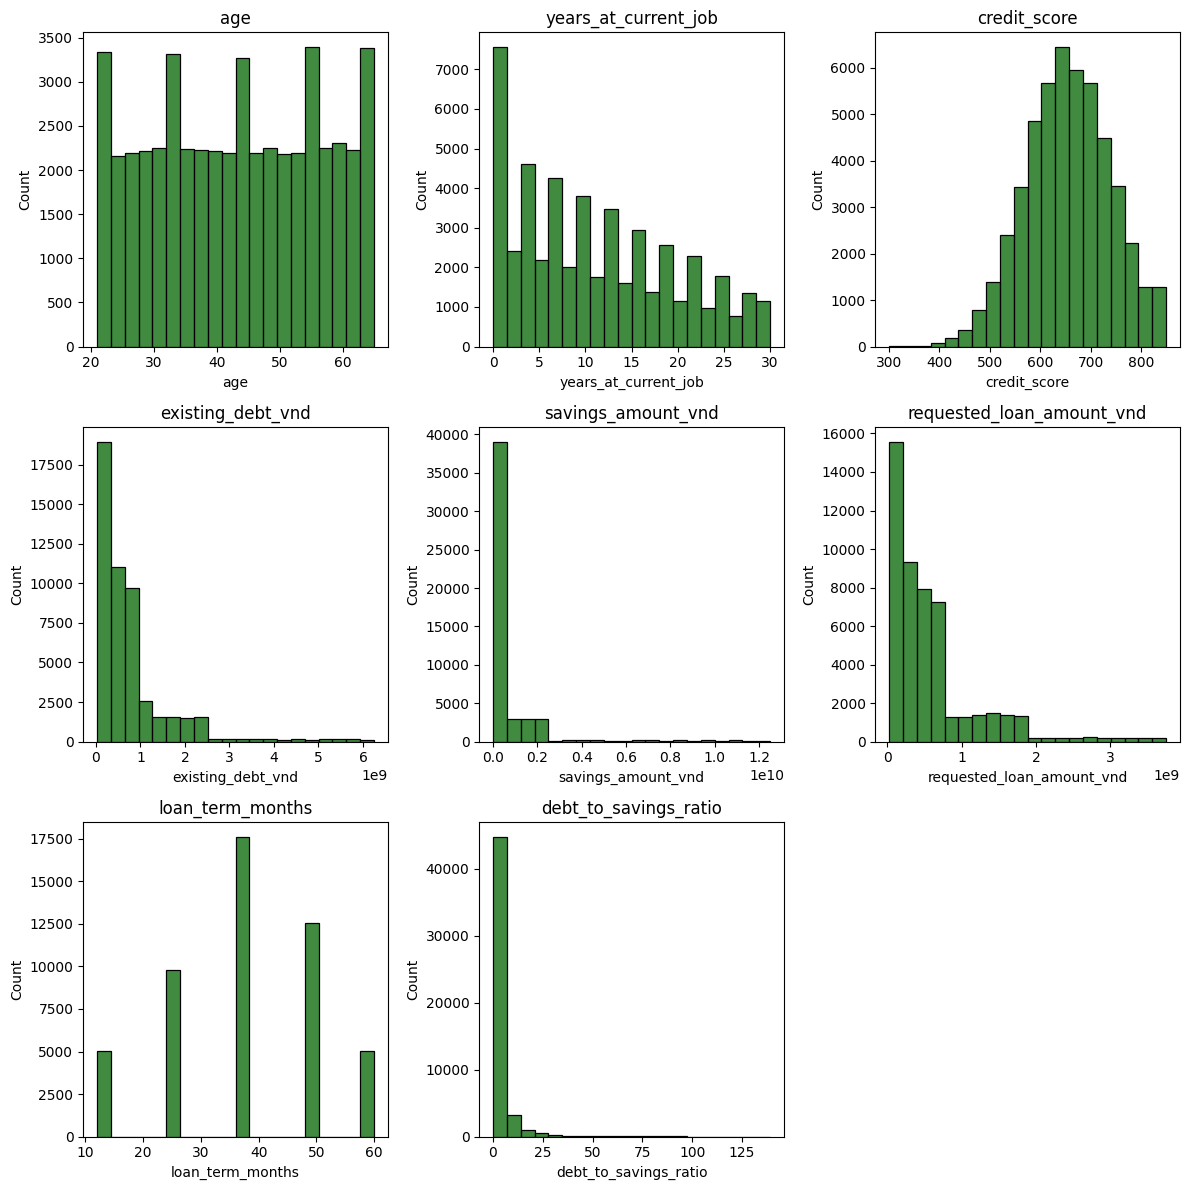

In [ ]:
# Now, we check the data distribution.
plt.figure(figsize=(12,12))
for i, col in enumerate(numerical_data.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(numerical_data[col], bins=20, color="darkgreen", edgecolor="black")
    plt.title(col)
plt.tight_layout()
plt.show()

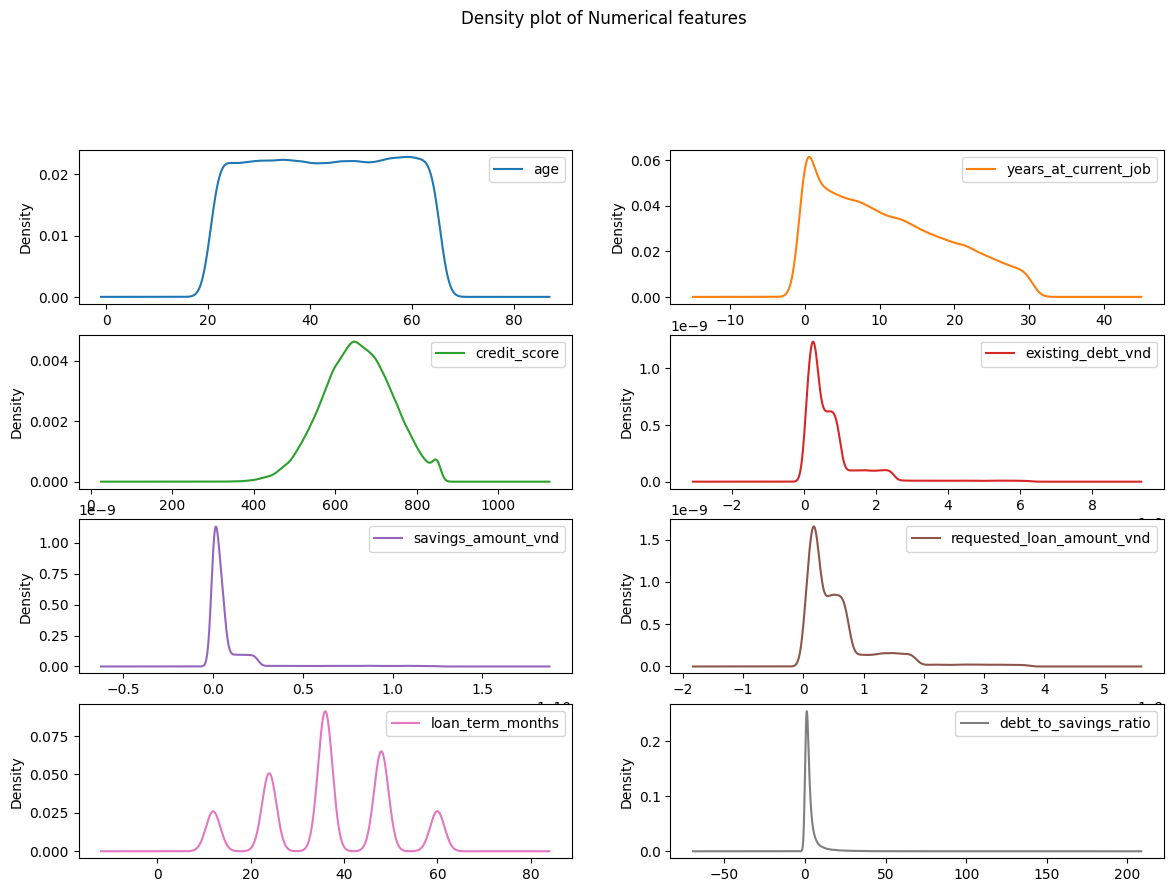

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

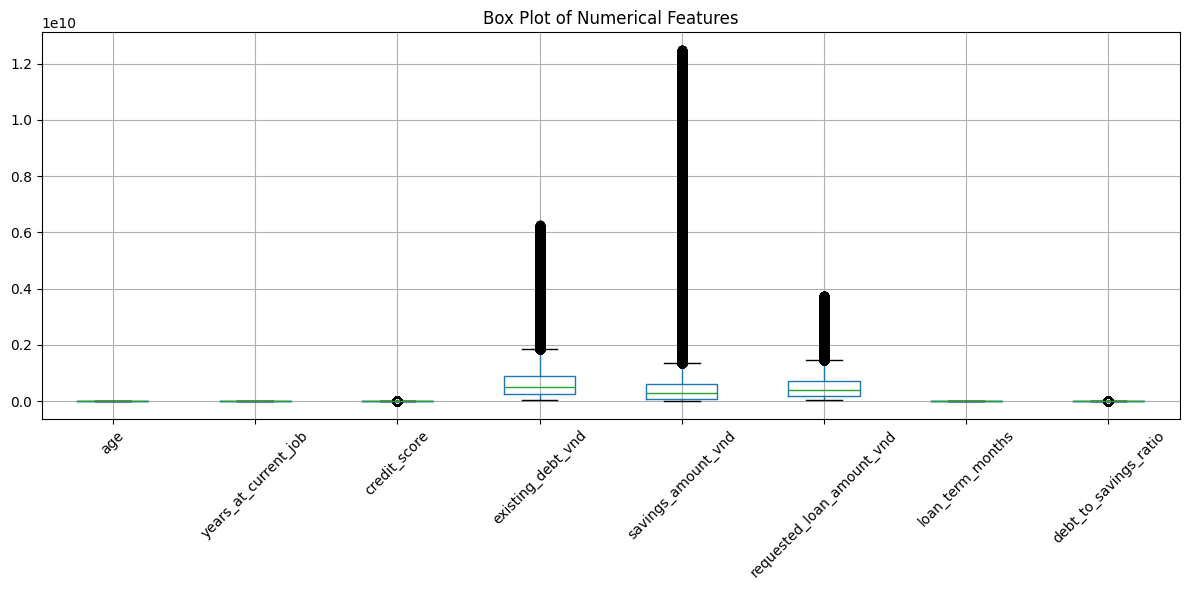

In [ ]:
# Box plot of numerical features:
num_cols = df.select_dtypes(include=['number']).columns

# Vẽ boxplot cho toàn bộ biến số
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=90)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment:**

> Financial concentration at lower levels

- Most customers have relatively low debt, savings, and loan amounts.

- A small minority stand out with extremely high values → signaling clear customer segmentation between mass-market and premium clients.

##Categorical Features

In [ ]:
# Lấy tất cả các cột dạng categorical (object hoặc category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Đếm số nhãn khác nhau trong từng cột
unique_counts = df[cat_cols].nunique()

print(unique_counts)

customer_id              50000
income_level                 4
employment_status            4
home_ownership_status        3
loan_purpose                 6
default_status               2
income_level_en              4
credit_rating                5
dtype: int64


In [ ]:
# Lọc categorial cols
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() <= 20]

for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(df[col].value_counts(dropna=False))  # Hiển thị số lần xuất hiện của từng giá trị (kể cả NaN)
    print("-" * 50)

🔹 Column: income_level
income_level
Từ 8 - 20 triệu VND/tháng     22375
Dưới 8 triệu VND/tháng        14914
Từ 20 - 45 triệu VND/tháng    10209
Trên 45 triệu VND/tháng        2502
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: employment_status
employment_status
Toàn thời gian    32381
Tự kinh doanh      7643
Bán thời gian      7527
Thất nghiệp        2449
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: home_ownership_status
home_ownership_status
Thuê nhà    24925
Trả góp     17572
Sở hữu       7503
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: loan_purpose
loan_purpose
Hợp nhất nợ     17630
Sửa chữa nhà    10054
Kinh doanh       7482
Mua xe           6005
Học vấn          4866
Y tế             3963
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: default_status
default_status
Paid in full    34495
Defaulted       15505
Name: coun

**Comment:**

> Income level

- The majority of customers fall into the 8–20M VND/month group (Medium, ~45%).
- The Low-income group (<8M VND, ~30%) is also significant
- The High (20–45M VND, ~20%) and Very High (>45M VND, ~5%) groups are smaller but represent higher CLV potential.

> Employment Status

- Most customers are full-time employees (~65%), which is expected.

- Self-employed (~15%)and part-time (~15%) represent non-traditional workers
 → underserved by banks, attractive to fintechs.

- Unemployed (~5%) is a small but high-risk group

> Home ownership

- Nearly 50% are renters, ~35% are paying mortgages, and only 15% are outright homeowners.

- A high proportion of renters indicates a younger, less asset-accumulated customer base.

=>  Potential for consumer loans and housing-related financing products.

> Loan purpose

- Borrowing demand is mainly for debt consolidation (35%) and home renovation (20%).

> Default status

- ~69% repaid in full, while ~31% defaulted.

- The default rate is relatively high → risk segmentation is essential

> Credit rating

- Fair (38%) is the largest segment → mid-tier customers with moderate risk.
- Poor (19%) and Excellent (5%) represent the two extremes.


=> The dataset shows a core customer base of medium-income, full-time employees, renters, with Fair–Good credit scores. These customers (CAN/MAY) underserved by traditional banks and represent a prime growth opportunity for FinInnovate. (NOT SURE)

## Correlation Analysis

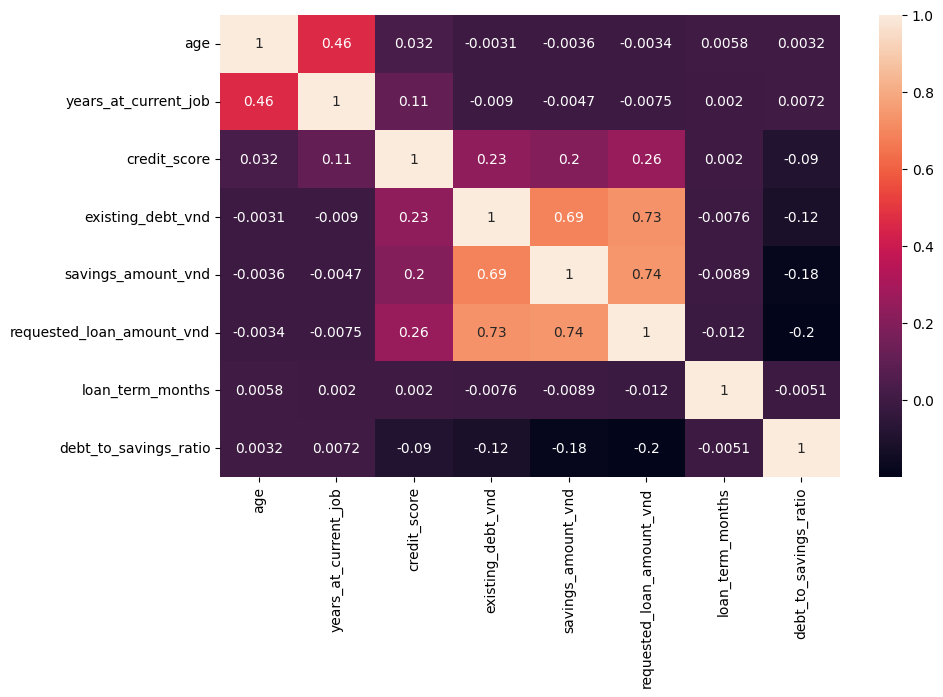

In [ ]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), ax=ax, annot=True)
plt.show()

> Age and Job Tenure

Age and years at current job show a moderate positive correlation (0.46).

This makes sense: older customers tend to have longer job tenure.

> Debt, Savings, and Loan Amount

Existing debt, savings amount, and requested loan amount are highly correlated (0.69–0.74).

Customers with higher debt also tend to have more savings and request larger loans.

This indicates that financial capacity (savings + existing obligations) strongly relates to borrowing demand.

> Credit Score

Credit score has moderate positive correlations with debt (0.23), savings (0.20), and loan amount (0.26).

Suggests that customers with higher credit scores may be more financially active (both saving and borrowing).

> Debt-to-Savings Ratio

Shows negative correlations with credit score (-0.09), debt (-0.12), savings (-0.18), and loan amount (-0.20).

Meaning: a higher debt-to-savings ratio generally reflects weaker financial health and lower credit scores.

> Loan Term

Loan term months has very weak correlations with other variables.

Indicates that loan duration is more likely determined by product choice or customer preference rather than financial characteristics.

In [ ]:
# Xóa khoảng trắng thừa ở đầu/cuối chuỗi
df['default_status'] = df['default_status'].str.strip()

# Sau đó map lại
df['is_default'] = df['default_status'].map({'Defaulted': 1, 'Paid in full': 0})

# Kiểm tra kết quả
print(df['default_status'].unique())
print(df['is_default'].value_counts())

['Defaulted' 'Paid in full']
is_default
0    34495
1    15505
Name: count, dtype: int64


/tmp/ipython-input-20276106.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')


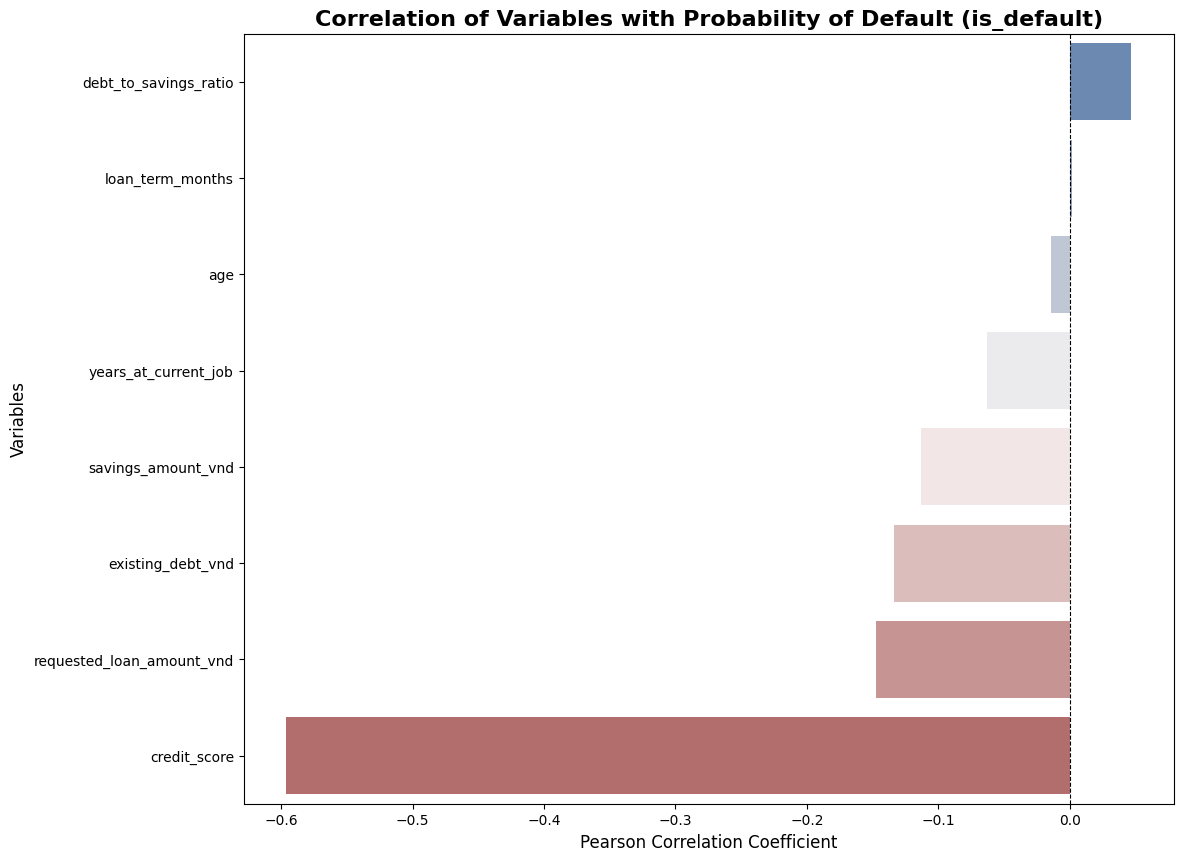

In [ ]:
# Tính ma trận tương quan Pearson
corr_matrix = df.corr(numeric_only=True)

# Lấy tương quan với biến target
corr_with_target = corr_matrix['is_default'].drop('is_default').sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 10))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')
plt.title('Correlation of Variables with Probability of Default (is_default)', fontsize=16, fontweight='bold')
plt.xlabel('Pearson Correlation Coefficient', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.show()

**Comment**

Credit score is by far the most influential factor in predicting default.

Financial health indicators like debt-to-savings ratio also provide useful signals, though weaker.

Demographic features (age, job tenure) and loan terms add little predictive power.

##Customer snapshot

/tmp/ipython-input-3736095464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="default_status", y="count", data=Imbalance, palette=['seagreen','b'])


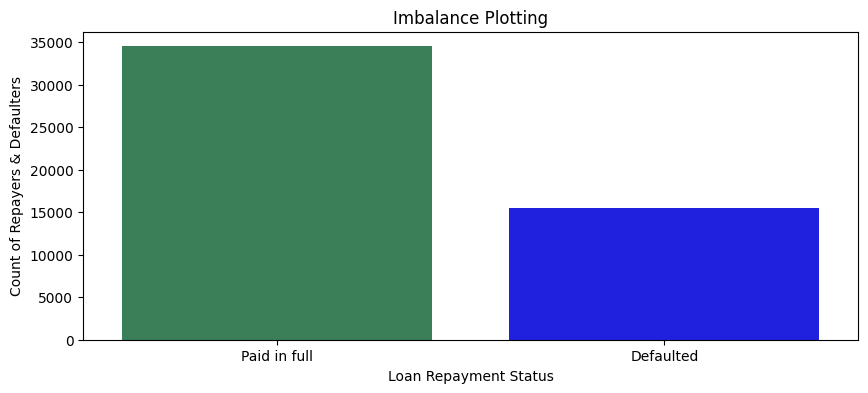

,default_status,count
0,Paid in full,34495
1,Defaulted,15505


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng Paid in full vs Defaulted trong master_df.csv
Imbalance = df["default_status"].value_counts().reset_index()
Imbalance.columns = ["default_status", "count"]

# Vẽ biểu đồ imbalance
plt.figure(figsize=(10,4))
sns.barplot(x="default_status", y="count", data=Imbalance, palette=['seagreen','b'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

Imbalance

In [ ]:
df['default_status'].value_counts(normalize = True)*100

,proportion
default_status,
Paid in full,68.99
Defaulted,31.01


=> As per the above data, we can say that our data set is imbalanced with almost 31% defaulters. Rest all 68% were able to repay the loans.

**Observation of Age Column:**

- Min = 21

- Max = 65

- Mean ≈ 43

- 50% (median) = 43

We decide to divide age into segments:
- Under 25 : Early adults

- 25–34: Young professionals

- 35–44: Mid-career

- 45–54: Late career

- 55+ : Pre-retirement or retirement

> This can be a common way of division in finance and credit as it is associated borrowing behavior (buying house, investment, retirement,..)



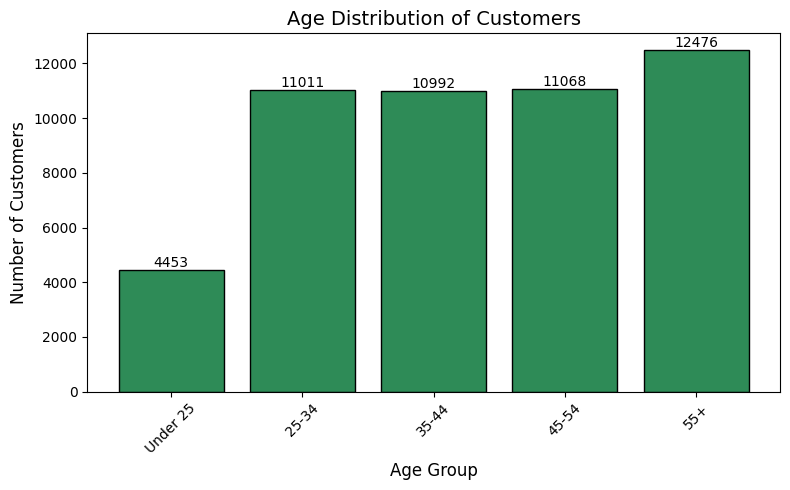

In [ ]:
# Assuming df is your DataFrame and age_group
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 24, 34, 44, 54, 120],
    labels=['Under 25', '25-34', '35-44', '45-54', '55+']
)

# Count customers based on age_group
age_counts = df['age_group'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(age_counts.index, age_counts.values, color='seagreen', edgecolor='black')

# Add label on each column
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.title("Age Distribution of Customers", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment on Age Distribution:**

- Older customers (55+) form the largest group with 12,476 borrowers, indicating strong reliance on credit in later stages of life.

- Middle-aged groups (35–54) are also dominant, each contributing around 11,000 borrowers, confirming that this is the core customer base for lending.

- Young adults (25–34) account for about 22% of total borrowers, showing high demand related to life events such as home purchase, marriage, or family setup.

- Under 25 is the smallest segment (4,453 borrowers, ~9%). This group typically has unstable income and limited credit history, which reduces borrowing activity.

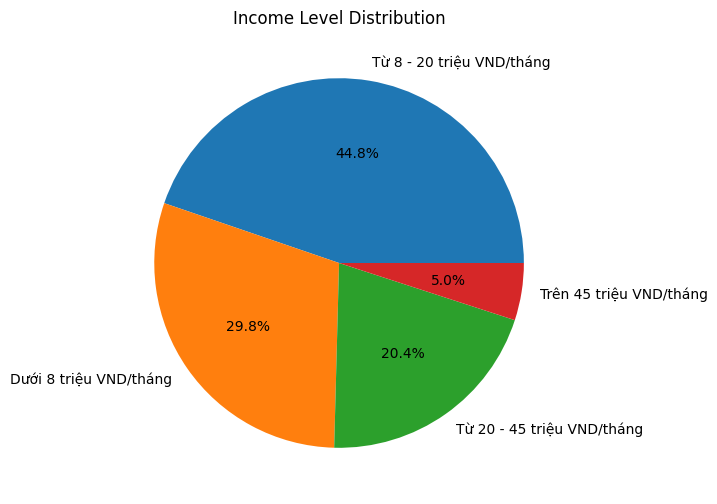

In [ ]:
# Draw chart based on income
plt.figure(figsize=(10, 6))
plt.pie(df['income_level'].value_counts(), labels=df['income_level'].value_counts().index, autopct='%1.1f%%')
plt.title('Income Level Distribution')
plt.show()

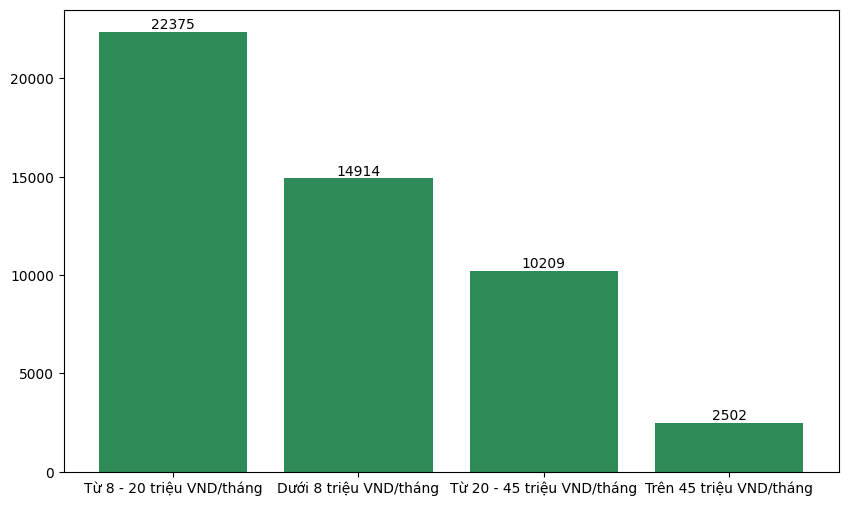

In [ ]:
# Draw bar chart based on income màu seagreen có label SỐ LIỆU TRÊN MỖI CỘT
plt.figure(figsize=(10, 6))
plt.bar(df['income_level'].value_counts().index, df['income_level'].value_counts().values, color='seagreen')
# Add detail number on each column
for i, v in enumerate(df['income_level'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

**Comment on the income:**
- Majority of borrowers fall in the 8–20M VND/month **(medium)** segment (22,375 customers, ~45%), representing the backbone of FinInnovate’s customer base.

- High-income borrowers (above 45M VND/month) are relatively small (~5%) but represent premium customers for larger loan products or cross-selling opportunities.

**Strategic Insights for FinInnovate:**

- Prioritize products for the 8–20M group, since they represent the largest demand pool.
- Consider premium financial products (investment-linked loans, wealth management credit) for the >45M group to maximize profitability from a smaller but high-value base.

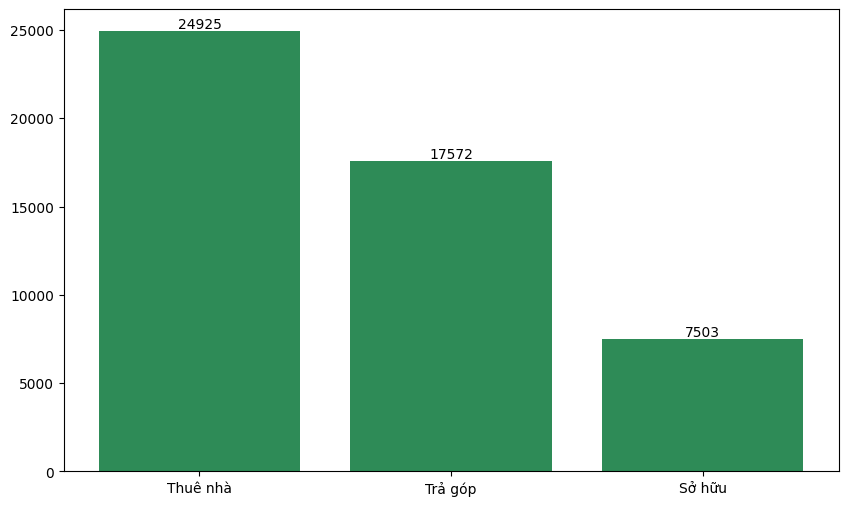

In [ ]:
# bar chart: home ownership
plt.figure(figsize=(10, 6))
plt.bar(df['home_ownership_status'].value_counts().index, df['home_ownership_status'].value_counts().values, color='seagreen')
# Add label on each column
for i, v in enumerate(df['home_ownership_status'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

Comment:
- Most of the costumers are renters, and pay installment
- Few own houses

<BarContainer object of 4 artists>

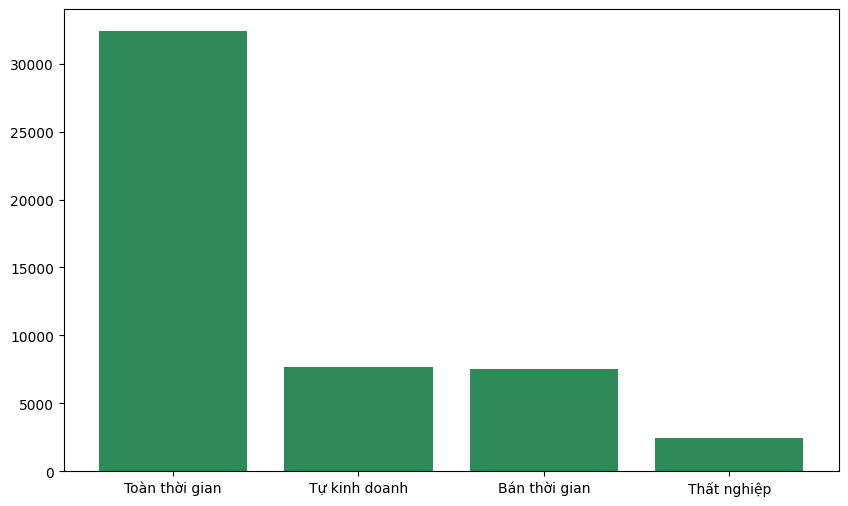

In [ ]:
# bar chart : employment_status
plt.figure(figsize=(10, 6))
plt.bar(df['employment_status'].value_counts().index, df['employment_status'].value_counts().values, color='seagreen')


**Comment:**
- The majority of the customers are working full-time.
- Few of customers work part-time and self-employed.
- The unemployed accounts for the smallest portion of customer segment.

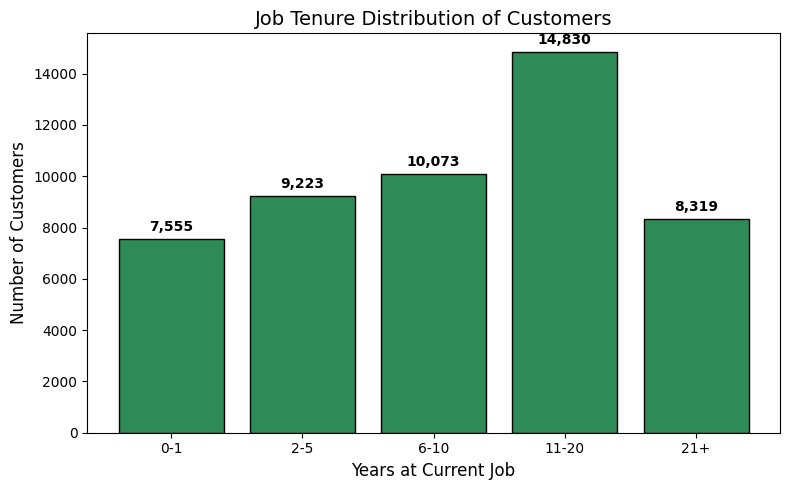

In [ ]:
# Work experience:
# Tạo phân nhóm
df['job_tenure_group'] = pd.cut(
    df['years_at_current_job'],
    bins=[-1, 1, 5, 10, 20, float('inf')],
    labels=['0-1', '2-5', '6-10', '11-20', '21+']
)

# Đếm số khách hàng theo nhóm
job_tenure_counts = df['job_tenure_group'].value_counts().sort_index()

# Vẽ bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(job_tenure_counts.index.astype(str), job_tenure_counts.values,
               color='seagreen', edgecolor='black')

plt.title("Job Tenure Distribution of Customers", fontsize=14)
plt.xlabel("Years at Current Job", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Thêm nhãn số liệu gốc trên cột
for bar, count in zip(bars, job_tenure_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 200, f"{count:,}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Comment:**

Borrowers with 11–20 years of work experience make up the largest share (~30%), indicating a stable and reliable customer base.

Majority of applicants (≈70%) have ≤10 years of work experience — indicating relatively young and early-career borrowers.

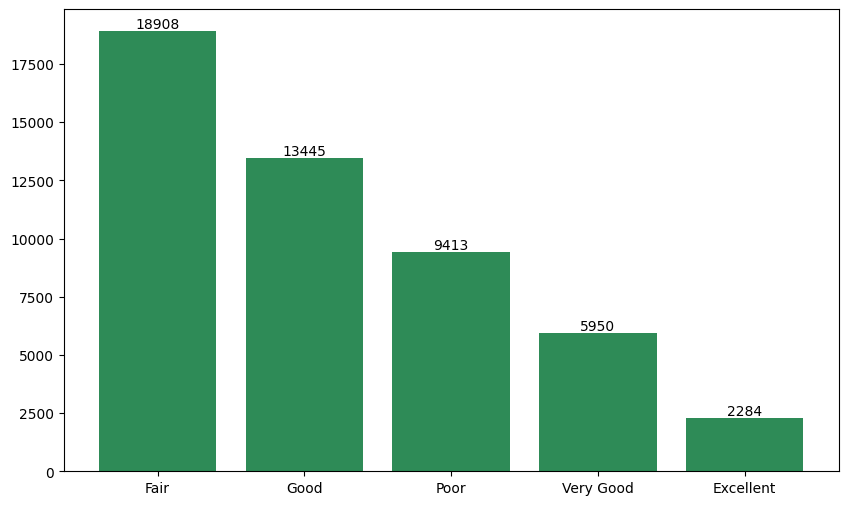

In [ ]:
#  CREDIT_RATING
plt.figure(figsize=(10, 6))
plt.bar(df['credit_rating'].value_counts().index, df['credit_rating'].value_counts().values, color='seagreen')

# Add the exact number on each column
for i, v in enumerate(df['credit_rating'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)


**Comment:**

> **Observation:**

- Excellent: 2,284 customers (~5%)

- Very Good: 5,950 customers (~13%)

- Good: 13,445 customers (~30%)

- Fair: 18,908 customers (~42%) → largest group

- Poor: 9,413 customers (~21%)

=> Fair + Poor = ~63% (higher risk), while Good + Very Good + Excellent = ~37% (lower risk).

> **Insight:**
- The Fair segment dominates the portfolio, carrying elevated risk.
- Excellent & Very Good customers remain high-quality but niche.



>  The dataset shows a core customer base of medium-income, full-time employees, renters, with Fair–Good credit scores.






##Customer Behavior

Text(0.5, 1.0, 'Loan Purpose Distribution')

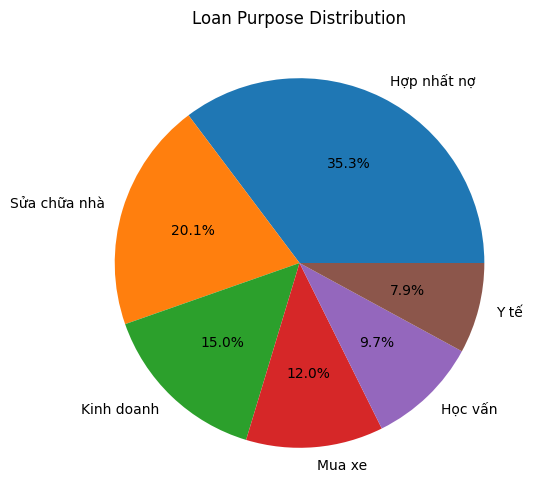

In [ ]:
# Loan Purpose Distribution → Pie chart

plt.figure(figsize=(10, 6))
plt.pie(df['loan_purpose'].value_counts(), labels=df['loan_purpose'].value_counts().index, autopct='%1.1f%%')
plt.title('Loan Purpose Distribution')

Comment:
Most borrowers take loans mainly for debt consolidation

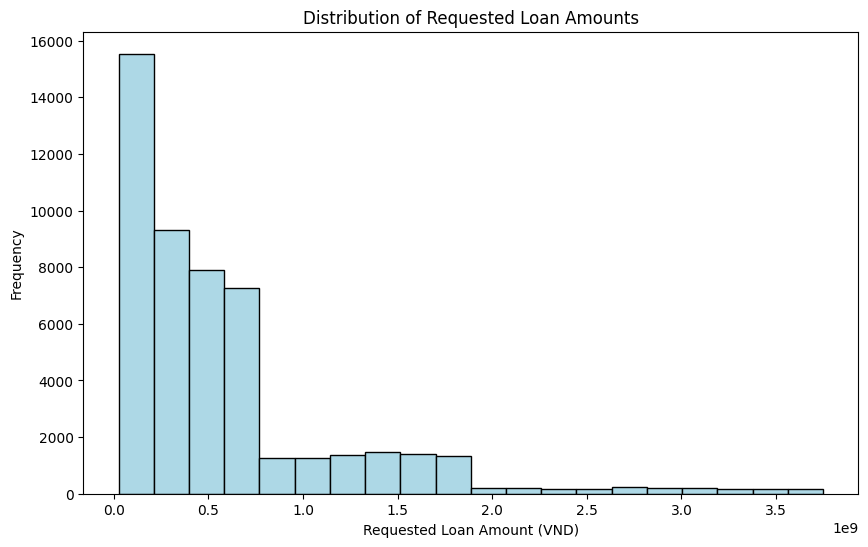

In [ ]:
# Vẽ histogram requested_loan_amount
plt.figure(figsize=(10, 6))
plt.hist(df['requested_loan_amount_vnd'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Requested Loan Amount (VND)')
plt.ylabel('Frequency')
# Add đường mật độ
plt.title('Distribution of Requested Loan Amounts')
plt.show()

**Comment:**
Most borrowers request relatively small loans (below 500 million VND), while very large loans (above 2 billion VND) are rare outliers. The distribution is highly right-skewed, indicating that small and medium-sized loans dominate the market.


/tmp/ipython-input-1265094293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


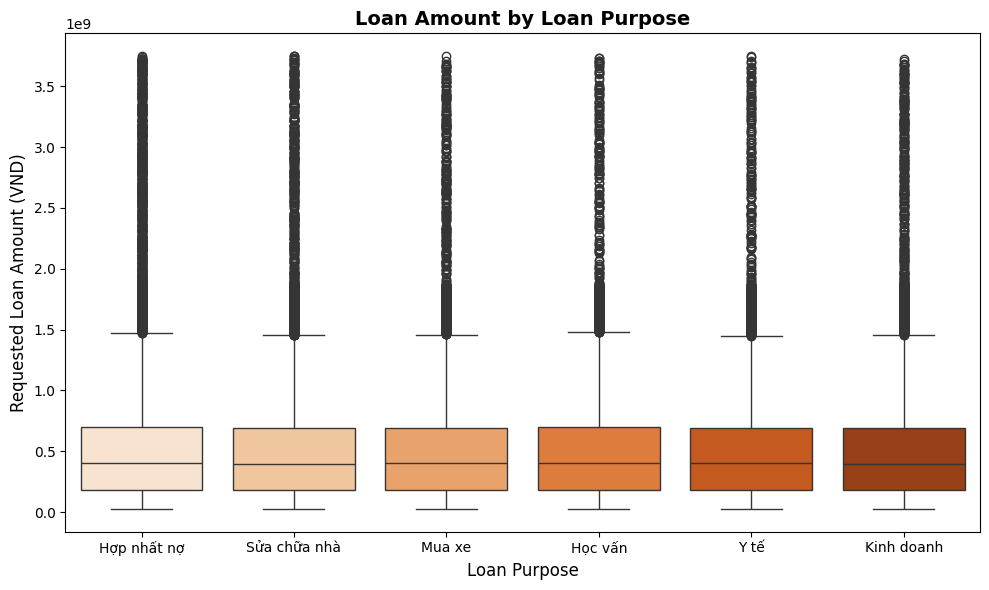

In [ ]:

plt.figure(figsize=(10,6))

# Vẽ boxplot
sns.boxplot(
    x='loan_purpose',
    y='requested_loan_amount_vnd',
    data=df,
    showfliers=True,   # hiển thị outliers
    palette="Oranges"
)

# Thêm tiêu đề và nhãn
plt.title("Loan Amount by Loan Purpose", fontsize=14, weight='bold')
plt.xlabel("Loan Purpose", fontsize=12)
plt.ylabel("Requested Loan Amount (VND)", fontsize=12)

# Hiển thị
plt.tight_layout()
plt.show()


 Comment:
- Most loans are taken for debt consolidation, with the highest median loan amounts compared to other purposes."

- Other loan purposes such as home improvement, vehicle purchase, education, healthcare, and business show similar distributions with medians around 300–400M VND."

- A large number of extreme outliers exist across all categories, suggesting that a few customers request exceptionally large loans, which may pose higher credit risk.

<Figure size 800x600 with 0 Axes>

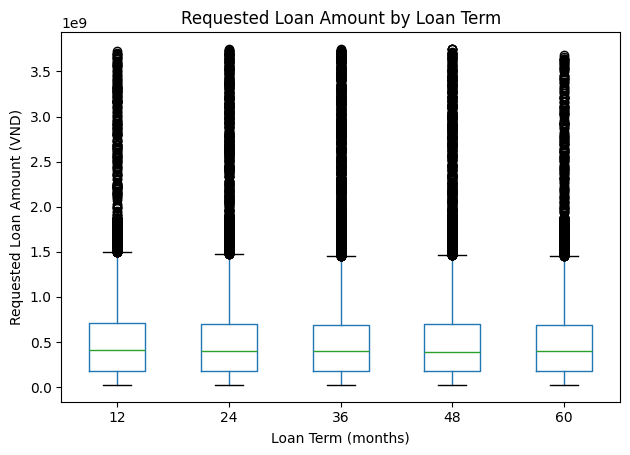

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.boxplot(
    column='requested_loan_amount_vnd',
    by='loan_term_months',
    grid=False,
    showfliers=True  # hiện luôn outlier
)

plt.ylabel('Requested Loan Amount (VND)')
plt.xlabel('Loan Term (months)')
plt.title('Requested Loan Amount by Loan Term')
plt.suptitle("")  # bỏ title mặc định của pandas
plt.tight_layout()
plt.show()


**Comment:**
- The requested loan amount shows little variation across different loan terms (12–60 months), with median values around 350–400 million VND.
- Most loans fall between 200–700 million VND, while very large loans (up to 3.5 billion VND) appear as outliers across all terms.

 > Borrowers usually request moderate loan amounts (a few hundred million VND), with little difference across loan terms.
 Very large loans (in the billions of VND) appear across all terms, not just longer ones.

 > Therefore, the loan term does not seem to be the decisive factor in the loan amount requested; instead, it may depend on the borrower’s purpose or financial capacity.

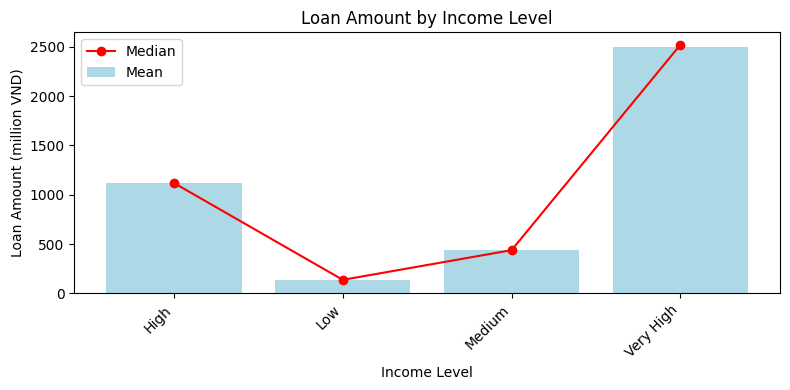

In [ ]:
if 'income_level_en' in df.columns:
    income_stats = df.groupby('income_level_en')['requested_loan_amount_vnd'].agg(['mean','median']).reset_index()

    plt.figure(figsize=(8,4))
    plt.bar(income_stats['income_level_en'].astype(str), income_stats['mean']/1e6,
            color="lightblue", label="Mean")
    plt.plot(income_stats['income_level_en'].astype(str), income_stats['median']/1e6,
             color="red", marker="o", label="Median")
    plt.title('Loan Amount by Income Level')
    plt.xlabel('Income Level')
    plt.ylabel('Loan Amount (million VND)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

**Comment:**
Borrowers with higher income levels tend to request significantly larger loans, with the “Very High” group standing out at around 2.5 billion VND. In contrast, low-income borrowers typically request much smaller loans.

 > Overall, loan amount appears strongly correlated with income level.

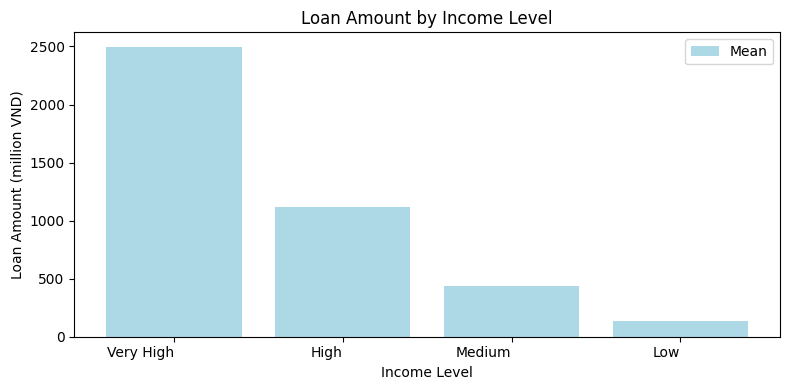

In [ ]:
if 'income_level_en' in df.columns:
    income_stats = (
        df.groupby('income_level_en')['requested_loan_amount_vnd']
        .agg(['mean','median'])
        .reset_index()
    )

    # Sắp xếp theo mean từ cao xuống thấp
    income_stats = income_stats.sort_values(by="mean", ascending=False)

    plt.figure(figsize=(8,4))
    plt.bar(
        income_stats['income_level_en'].astype(str),
        income_stats['mean'] / 1e6,
        color="lightblue",
        label="Mean"
    )
    plt.title('Loan Amount by Income Level')
    plt.xlabel('Income Level')
    plt.ylabel('Loan Amount (million VND)')
    plt.xticks(rotation=0, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

<Figure size 1000x500 with 0 Axes>

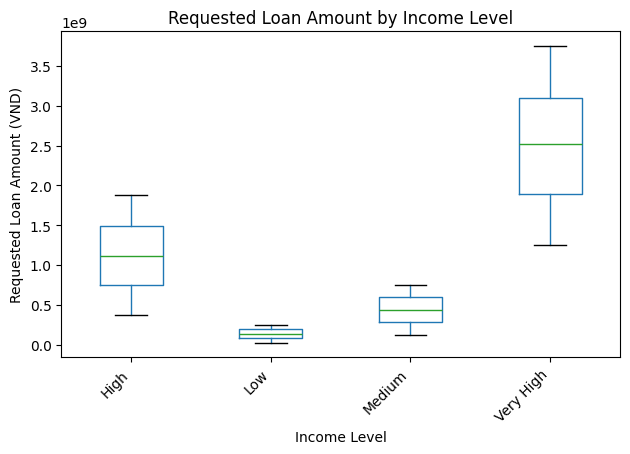

In [ ]:
# Or we can observe by the box plot:
if 'income_level_en' in df.columns:
    plt.figure(figsize=(10,5))
    df.boxplot(
        column='requested_loan_amount_vnd',
        by='income_level_en',
        grid=False,
        showfliers=True
    )
    plt.ylabel('Requested Loan Amount (VND)')
    plt.xlabel('Income Level')
    plt.title('Requested Loan Amount by Income Level')
    plt.suptitle("")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

##Credit Risk & Default Analysis

**Our target:**
Find the influential factor affecting default ability

**Age_Group**

/tmp/ipython-input-3556222277.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_counts = df.groupby(['age_group', 'default_status']).size().unstack(fill_value=0)


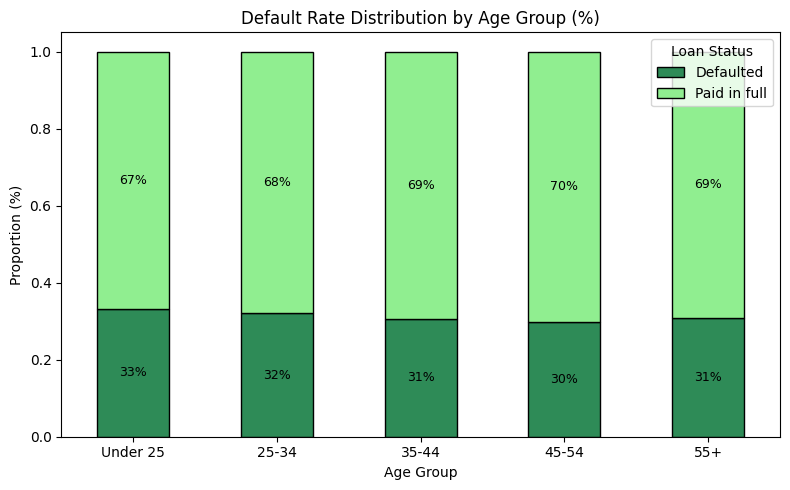

In [ ]:

df['default_status'] = df['default_status'].str.strip()
# Map default_status: 1 = Defaulted, 0 = Paid in full
df['default_status_num'] = df['default_status'].map({
    'Paid in full': 0,
    'Defaulted': 1
})

# Tạo cột nhóm tuổi
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 24, 34, 44, 54, 120],
    labels=['Under 25', '25-34', '35-44', '45-54', '55+']
)

# Đếm số lượng Paid in full vs Defaulted theo nhóm tuổi
age_default_counts = df.groupby(['age_group', 'default_status']).size().unstack(fill_value=0)

# Chuẩn hóa thành % theo từng nhóm
age_default_pct = age_default_counts.div(age_default_counts.sum(axis=1), axis=0)

# Vẽ stacked bar chart (%)
ax = age_default_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=['seagreen', 'lightgreen'],
    edgecolor="black"
)

plt.title("Default Rate Distribution by Age Group (%)")
plt.xlabel("Age Group")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0)
plt.legend(title="Loan Status", loc="upper right")

# Thêm nhãn % trên từng phần của cột
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # chỉ hiển thị nếu có dữ liệu
        ax.text(
            x + width/2,
            y + height/2,
            f"{height:.0%}",
            ha='center', va='center', fontsize=9, color="black"
        )

plt.tight_layout()
plt.show()

**Comment:**
- Around 30% of customers across all age groups defaulted, indicating a relatively high and consistent credit risk.→ needs deeper analysis to uncover what financial or behavioral characteristics set them apart from repaid customers.

- About 70% successfully repaid in full, forming the bank’s core reliable customer base.→ requiring strong retention and upsell strategies.

=> **Age does not appear to be a strong differentiator for default risk**

→ Deeper analysis should focus on financial variables (income, loan purpose, credit score, debt-to-savings ratio).



**Income**

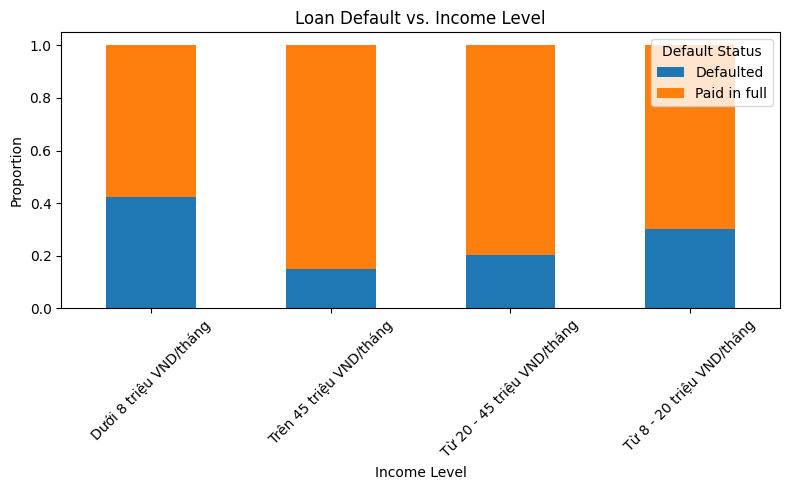

In [ ]:
# Calculate default rate by income level
default_rate = (
    df.groupby("income_level")["default_status"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Pivot for plotting
plot_data = default_rate.pivot(
    index="income_level", columns="default_status", values="proportion"
)

# Sort by income if possible
plot_data = plot_data.reindex(sorted(plot_data.index), axis=0)

# Plot stacked bar chart
plot_data.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("Loan Default vs. Income Level")
plt.xlabel("Income Level")
plt.ylabel("Proportion")
plt.legend(title="Default Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Comment:**

- People earn < 8M VND / 1 month are the most vunerable to loan default.(possibly due to limited financial buffers.)

→ require stricter assessment.

- Higher-income customers are more financially stable and represent a low-risk, high-value segment.

→ prime targets for retention and upsell

- Default rates decrease as income level increases, showing a clear negative correlation between income and credit risk.

**home_ownership_status**

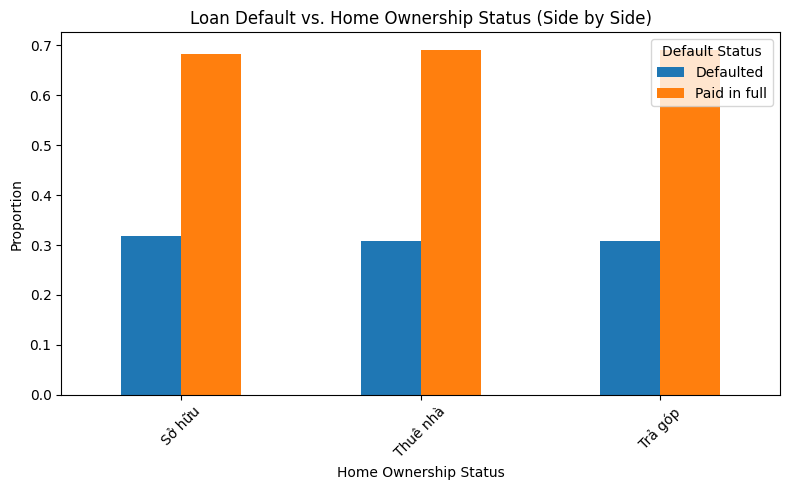

In [ ]:
# Calculate default rate by home ownership status
default_rate_home = (
    df.groupby("home_ownership_status")["default_status"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Pivot for plotting
plot_data_home = default_rate_home.pivot(
    index="home_ownership_status", columns="default_status", values="proportion"
)

# Plot side-by-side bar chart
plot_data_home.plot(kind="bar", stacked=False, figsize=(8, 5))
plt.title("Loan Default vs. Home Ownership Status (Side by Side)")
plt.xlabel("Home Ownership Status")
plt.ylabel("Proportion")
plt.legend(title="Default Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comment:
- All groups have defaulted and paid in full nearly similar to each other
> Hence, home_ownership_status can not be a really important indicator of loan default  

Loan_purpose

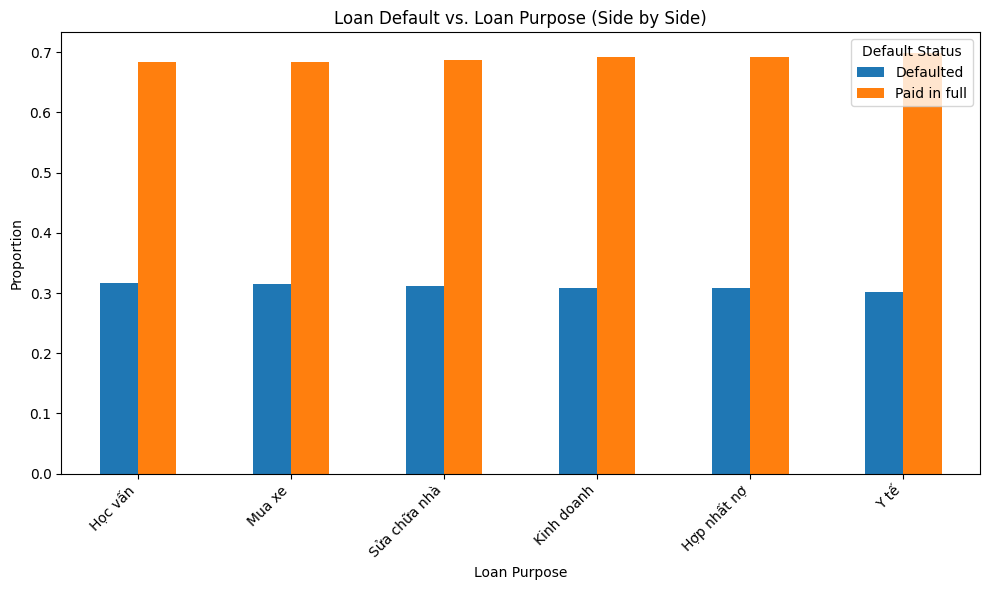

In [ ]:
# Calculate default rate by loan purpose
default_rate_purpose = (
    df.groupby("loan_purpose")["default_status"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Pivot for plotting
plot_data_purpose = default_rate_purpose.pivot(
    index="loan_purpose", columns="default_status", values="proportion"
)

# Sort purposes by default rate descending for better visualization
if "Defaulted" in plot_data_purpose.columns:
    plot_data_purpose = plot_data_purpose.sort_values("Defaulted", ascending=False)

# Plot side-by-side bar chart
plot_data_purpose.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("Loan Default vs. Loan Purpose (Side by Side)")
plt.xlabel("Loan Purpose")
plt.ylabel("Proportion")
plt.legend(title="Default Status")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Comment**
- Loan purpose is not an important indicator of loan default

**Employment_Status**

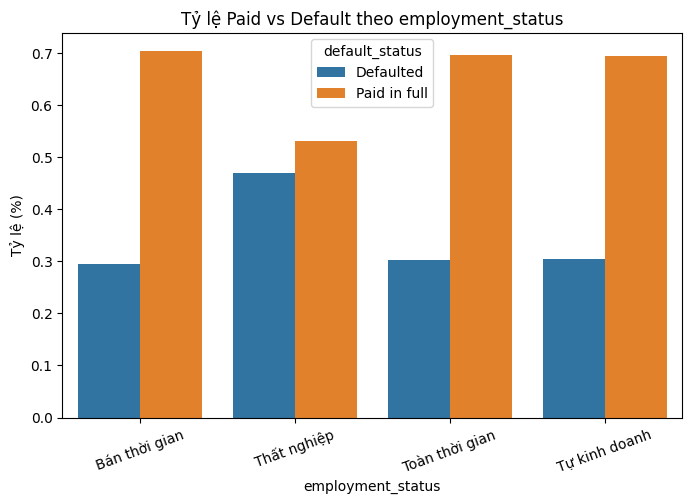

In [ ]:
# Vẽ biểu đồ cho thấy Tỷ lệ vỡ nợ giữa các nhãn
# Nhóm theo employment_status và default_status
df_group = df.groupby(["employment_status", "default_status"]).size().reset_index(name="count")

# Tính tỷ lệ trong từng nhóm employment_status
df_group["ratio"] = df_group.groupby("employment_status")["count"].transform(lambda x: x / x.sum())

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_group,
    x="employment_status",
    y="ratio",
    hue="default_status"
)
plt.title("Tỷ lệ Paid vs Default theo employment_status")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=20)
plt.show()

**Comment:**
- Borrowers who are employed part-time, full-time, or self-employed show a default rate of around 30%, indicating relatively moderate credit risk.

- In contrast, those who are unemployed exhibit a much higher default rate of approximately 50%, highlighting unemployment as a major risk factor.

> Employment status is a also strong predictor of default. Lending strategies should be more conservative when dealing with unemployed applicants, such as stricter credit checks or adjusted loan terms.

Credit_rating

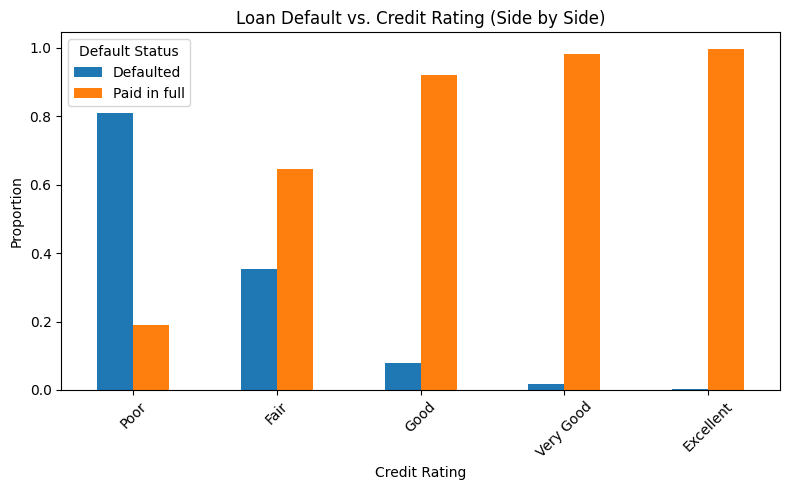

In [ ]:
# Calculate default rate by credit rating
default_rate_credit = (
    df.groupby("credit_rating")["default_status"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Pivot for plotting
plot_data_credit = default_rate_credit.pivot(
    index="credit_rating", columns="default_status", values="proportion"
)

# Sort credit_rating logically if possible (e.g., Poor < Fair < Good < Excellent)
rating_order = ["Poor", "Fair", "Good", "Very Good", "Excellent"]
plot_data_credit = plot_data_credit.reindex(rating_order).dropna(how="all")

# Plot side-by-side bar chart
plot_data_credit.plot(kind="bar", stacked=False, figsize=(8, 5))
plt.title("Loan Default vs. Credit Rating (Side by Side)")
plt.xlabel("Credit Rating")
plt.ylabel("Proportion")
plt.legend(title="Default Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Comment:**
1. Strong Negative Correlation

- Borrowers with Poor credit ratings have an extremely high likelihood of defaulting (>80%).

- As the credit rating improves, the proportion of defaults drops sharply.

2. Fair rating = still risky

- With Fair scores, more than 1/3 of loans default, meaning this group is still high risk.

3. Good rating = safe majority

- In the Good category, fewer than 1 in 10 borrowers default, showing much lower risk.

4. Very Good & Excellent = negligible defaults

- Defaults are almost nonexistent (<2%), making these the safest groups for lending.

> Clear predictor

- Unlike Age (which show mixed patterns), Credit Score provides a smooth, monotonic gradient of risk.

> Default risk decreases consistently as credit rating improves, proving that credit score can be one of the strongest predictors of default probability.

**Debt_to_saving_ratio**

/tmp/ipython-input-1602928912.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("debt_to_savings_group")["default_status"]


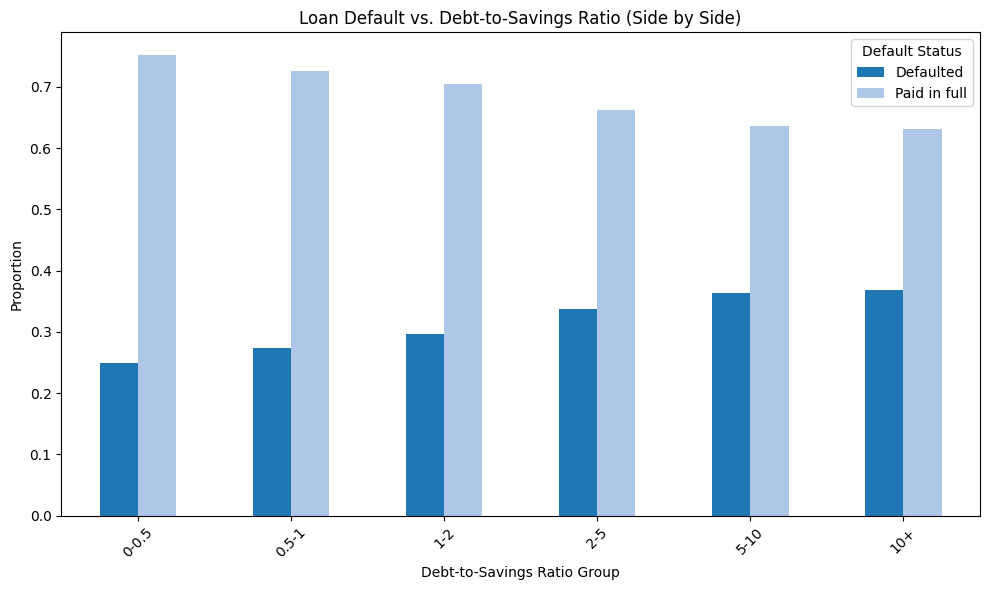

In [ ]:
# Create bins for debt_to_savings_ratio to group values for visualization
bins = [0, 0.5, 1, 2, 5, 10, float("inf")]
labels = ["0-0.5", "0.5-1", "1-2", "2-5", "5-10", "10+"]
df["debt_to_savings_group"] = pd.cut(df["debt_to_savings_ratio"], bins=bins, labels=labels)
# Calculate default rate by debt_to_savings_group
default_rate_dsr = (
    df.groupby("debt_to_savings_group")["default_status"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)
colors = ["#1f77b4", "#aec7e8"]  # xanh đậm, xanh nhạt

# Pivot for plotting
plot_data_dsr = default_rate_dsr.pivot(
    index="debt_to_savings_group", columns="default_status", values="proportion"
)

# Plot side-by-side bar chart
plot_data_dsr.plot(kind="bar", stacked=False, figsize=(10, 6),color=colors)
plt.title("Loan Default vs. Debt-to-Savings Ratio (Side by Side)")
plt.xlabel("Debt-to-Savings Ratio Group")
plt.ylabel("Proportion")
plt.legend(title="Default Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment:**
- Default rate increases steadily as the Debt-to-Savings Ratio rises.

- At low ratios (0–0.5), the default rate is ~25%, while at high ratios (10+), the default rate approaches ~37%.

- Paid-in-full share decreases correspondingly.

> Customers with higher debt relative to savings are more likely to default.This indicates weaker financial resilience—when debt grows faster than savings, repayment ability is compromised.

> The Debt-to-Savings Ratio is a strong risk indicator: borrowers with ratios >5 have notably higher default probabilities, customers with low debt-to-savings ratio (<0.5) show very low default risk, proving strong financial health.


**Implication**

- This makes Debt-to-Savings Ratio a critical variable for both credit risk assessment and customer segmentation.

- FinInnovate should target low-ratio customers for safer lending and design risk-adjusted products for high-ratio customers (e.g., higher collateral, stricter approval).


**years_at_current_job**

/tmp/ipython-input-140889946.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("job_tenure_bucket")["default_status"]


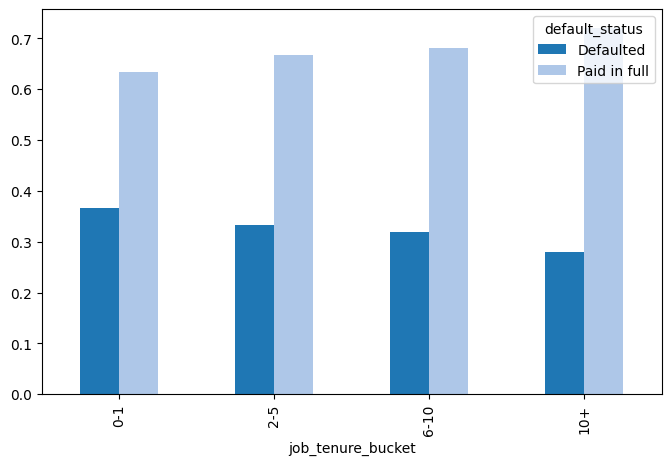

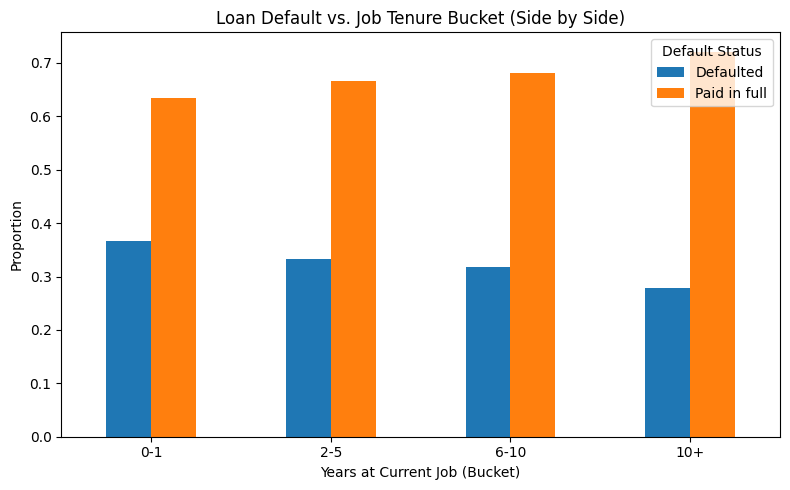

In [ ]:
# Create buckets for years at current job
bins = [-1, 1, 5, 10, 30]
labels = ["0-1", "2-5", "6-10", "10+"]
df["job_tenure_bucket"] = pd.cut(df["years_at_current_job"], bins=bins, labels=labels)

# Calculate default rate by tenure bucket
default_rate_bucket = (
    df.groupby("job_tenure_bucket")["default_status"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Pivot for plotting
plot_data_bucket = default_rate_bucket.pivot(
    index="job_tenure_bucket", columns="default_status", values="proportion"
)

# Plot side-by-side bar chart with custom colors
colors = ["#1f77b4", "#aec7e8"]  # xanh đậm và xanh nhạt

plot_data_bucket.plot(
    kind="bar",
    stacked=False,
    figsize=(8, 5),
    color=colors
)
plot_data_bucket.plot(kind="bar", stacked=False, figsize=(8, 5))
plt.title("Loan Default vs. Job Tenure Bucket (Side by Side)")
plt.xlabel("Years at Current Job (Bucket)")
plt.ylabel("Proportion")
plt.legend(title="Default Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




- Highest risk among new employees (0–1 year):
Default rate reaches nearly 37%, reflecting unstable income, limited assets, and short credit history.

- Risk decreases with longer tenure

> Apply stricter screening for new employees (0–1 year).Prioritize and offer preferential loan products to customers with 10+ years of job stability, as they represent a low-risk, high-value segment.


**REMARK:** Default rate can be influenced by factors as follows:
- Income
- Employment Status
- Credit rating (credit score)
- Debt-to-saving ratio
- Work experience
